In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [56]:
"""island = remove
Island_id = remove
kb_id = remove 
bag_id  = remove
Sex m = 1, f = 0
Gravid 1, 0, -1
Morph
- if not o,y,w remove
- y, o, w = 2, 1, 0
j= remove
Scars, ticks, mites
If n/a = 0
Substrate type 
Grass = leaves, shrub, wall = stonewall, tree = branch, rock, cement=ground=dirt, e5 = (6, 5, 4, 3, 2, 1, 0)"""
removed_columns = ['island']
data = pd.read_csv('please_work.csv')
variables_to_test = ['total % veg cover', '% RHumidity', 'Air temp', '% shrub cover', '% herbaceous veg', '% tree cover']
data
data = data.drop(removed_columns, axis=1)
# data = data.dropna()

In [57]:
data

,sex,morph,svl,head_length,head_width,head_depth,bicep_length,forearm_length,hand_finger_length,femur_length,tibia_length,toe,% shrub cover,% herbaceous veg,% tree cover,total % veg cover,% RHumidity,Air temp
0,m,o,63.34,17.24,9.45,7.81,6.46,7.39,8.10,12.74,10.50,16.72,NaN,NaN,NaN,NaN,NaN,NaN
1,m,w,55.82,15.88,8.22,6.09,5.84,5.84,7.35,11.95,10.02,16.70,NaN,NaN,NaN,NaN,NaN,NaN
2,m,y,65.89,18.12,10.10,7.62,7.02,7.11,8.26,14.24,11.70,17.70,0.0,10.0,0.0,10.0,40.0,18.1
3,m,y,58.63,16.35,8.43,6.87,6.84,6.86,7.13,12.39,10.87,16.14,5.0,10.0,0.0,15.0,42.8,17.6
4,m,o,63.54,17.30,9.49,7.92,6.55,6.58,8.00,12.79,10.64,16.83,0.0,80.0,10.0,90.0,39.8,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,m,w,57.34,15.43,7.61,6.99,6.61,6.61,8.06,12.51,10.16,16.16,NaN,NaN,NaN,NaN,NaN,NaN
317,m,y,65.67,18.40,9.89,8.34,7.02,6.96,8.99,14.14,10.75,18.24,NaN,NaN,NaN,NaN,NaN,NaN
318,f,y,63.81,15.07,7.10,6.38,5.97,6.90,7.24,13.14,9.64,14.14,NaN,NaN,NaN,NaN,NaN,NaN
319,m,w,63.87,18.16,9.41,7.59,7.05,7.06,7.90,13.75,11.70,18.33,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# data['scars'] = data['scars'].astype('int')
# data['ticks'] = data['ticks'].astype('int')
# data['mites'] = data['mites'].astype('int')

In [58]:
transposed_processed_matrix = []
for var in data:
    col = data[var]
    to_append = []
    if var == "sex":
        for x in col:
            if x == 'm':
                to_append.append(1)
            else:
                to_append.append(0)
    elif var == "morph":
        allowed = ['y', 'o', 'w']
        for x in col:
            if x == 'y':
                to_append.append(2)
            elif x == 'o':
                to_append.append(1)
            elif x == 'w':
                to_append.append(0)
            else:
                to_append.append('')
    if len(to_append) > 0:
        transposed_processed_matrix.append(np.array(to_append))
    else:
        transposed_processed_matrix.append(np.array(col))


In [59]:
sex = np.array(transposed_processed_matrix[:, 0]).T
morph = np.array(transposed_processed_matrix[1]).T
print(sex)
print(np.array(transposed_processed_matrix).shape)

TypeError: list indices must be integers or slices, not tuple

In [60]:
transposed_processed_matrix = np.array(transposed_processed_matrix).T

In [61]:
print(transposed_processed_matrix)
print(np.shape(transposed_processed_matrix))

[[ 1.    1.   63.34 ...   nan   nan   nan]
 [ 1.    0.   55.82 ...   nan   nan   nan]
 [ 1.    2.   65.89 ... 10.   40.   18.1 ]
 ...
 [ 0.    2.   63.81 ...   nan   nan   nan]
 [ 1.    0.   63.87 ...   nan   nan   nan]
 [ 1.    2.   60.51 ...   nan   nan   nan]]
(321, 18)


In [62]:
final_transponsed_matrix = []
for row in transposed_processed_matrix:
    if not '' in row:
        final_transponsed_matrix.append(row)
print(np.shape(final_transponsed_matrix))

(321, 18)


<ipython-input-62-c611364e5f71>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not '' in row:


In [63]:
B = np.array(final_transponsed_matrix, dtype=float)
without_last = B[:, 2:12]

In [64]:
pca = PCA(n_components=2)
pca.fit(without_last)
print(pca.explained_variance_ratio_)
total_var = 0
for x in pca.explained_variance_ratio_:
    total_var += x
    print(total_var)

[0.83223806 0.11178185]
0.83223805581868
0.9440199083231259


In [70]:
eigenvectors = pca.components_.T
without_last
proj = np.dot(without_last, eigenvectors)
evaluation_vectors = []
for i in range(12, 18):
    last = B[:, i:i+1]
    evaluation_vectors.append(last)
# print(np.shape(last))
print(proj.shape)
print(np.shape(proj))
print(np.shape(evaluation_vectors))

(321, 2)
(321, 2)
(6, 321, 1)


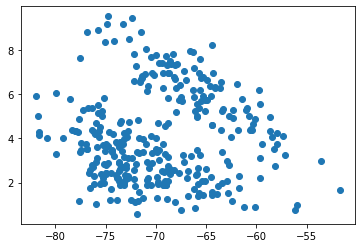

In [89]:
plt.scatter(x=proj[:, 0], y=proj[:, 1])

In [185]:
list_of_colors = []
colors_array = ['#ad760e', '#a2e408', '#1fbc35', '#055a25', '#FFFFFF']
temp_colors = ["#F80901","#9A213B","#3D3A74","#0E4691", '#FFFFFF']
humidity_colors = ['#1B9E77', '#FFEDA0', '#F46D43', '#D73027', '#FFFFFF']
list_of_colors.append(colors_array)
list_of_colors.append(temp_colors)
list_of_colors.append(humidity_colors)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  5., 19.,
        13., 24., 27., 17., 11.,  0.,  1.]),
 array([ 0.  ,  1.99,  3.98,  5.97,  7.96,  9.95, 11.94, 13.93, 15.92,
        17.91, 19.9 , 21.89, 23.88, 25.87, 27.86, 29.85, 31.84, 33.83,
        35.82, 37.81, 39.8 ]),
 <BarContainer object of 20 artists>)

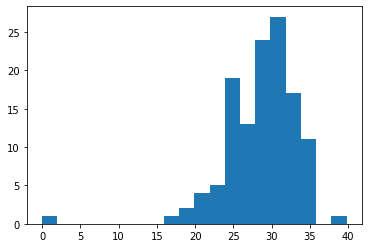

In [179]:
simple_plot = evaluation_vectors[5]
simple_plot = simple_plot[~np.isnan(simple_plot)]
plt.hist(simple_plot, bins=20)

In [117]:
characters = []
markers = ['o', '^']
print(np.shape(final_transponsed_matrix))
sex = np.array(final_transponsed_matrix)[:, 0]
morph = np.array(final_transponsed_matrix)[:, 1]
for x in sex:
    if x == 1:
        characters.append(markers[0])
    else:
        characters.append(markers[1])
print(characters)

(321, 18)
['o', 'o', 'o', 'o', 'o', '^', 'o', '^', '^', 'o', 'o', 'o', '^', '^', '^', 'o', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', '^', 'o', '^', 'o', 'o', 'o', 'o', '^', 'o', 'o', 'o', 'o', '^', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', 'o', '^', 'o', 'o', '^', 'o', '^', '^', '^', 'o', '^', '^', 'o', '^', 'o', '^', 'o', '^', '^', '^', '^', 'o', '^', '^', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', 'o', 'o', 'o', '^', 'o', '^', 'o', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', 'o', 'o', '^', 'o', 'o', '^', '^', 'o', 'o', '^', 'o', 'o', 'o', '^', 'o', '^', '^', '^', '^', '^', 'o', '^', '^', '^', 'o', '^', 'o', '^', 'o', 'o', 'o', 'o', '^', 'o', 'o', '^', '^', '^', 'o', '^', '^', '^', '^', '^', 'o', 'o', 'o', '^', 'o', 'o', 'o', '^', 'o', '^', 'o', 'o', 'o', '^', 'o', 'o', '^', 'o', 'o', '^', 'o', '^', '^', '^', 'o', '^', 'o', 'o', 'o', 'o', 'o', '^', 'o', 'o', 'o', 'o', 'o', 'o', '^', 'o', 'o', 'o', 'o', '^', 'o', '^', 'o',

In [195]:
import math
color_vectors = []
veg_color_vector = []
shrub_color = []
herbaceous_color = []
tree_cover = []
relative_humidity = []
temp = []
for x in evaluation_vectors[3]: # % veg cover
    if math.isnan(x):
        veg_color_vector.append(4)
    elif veg_color_vector == 100:
        veg_color_vector.append(3)
    else:
        veg_color_vector.append(int(x//25))
for x in evaluation_vectors[0]: # % shrub cover
    if math.isnan(x):
        shrub_color.append(4)
    elif x <= 25:
        shrub_color.append(0)
    elif x <= 50:
        shrub_color.append(1)
    elif x <= 80:
        shrub_color.append(2)
    else:
        shrub_color.append(3)
for x in evaluation_vectors[1]: # % herbaceous veg
    if math.isnan(x):
        herbaceous_color.append(4)
    elif herbaceous_color == 100:
        herbaceous_color.append(3)
    else:
        herbaceous_color.append(int(x//25))
for x in evaluation_vectors[2]: # % tree cover
    if math.isnan(x):
        tree_cover.append(4)
    elif tree_cover == 100:
        tree_cover.append(3)
    else:
        tree_cover.append(int(x//25))
for x in evaluation_vectors[4]: # % RHumidity
    if math.isnan(x):
        relative_humidity.append(4)
    elif x < 22:
        relative_humidity.append(0)
    elif x < 30:
        relative_humidity.append(1)
    elif x < 40:
        relative_humidity.append(2)
    elif x >= 40:
        relative_humidity.append(3)
for x in evaluation_vectors[5]: # Air temp
    if math.isnan(x):
        temp.append(4)
    elif x < 25:
        temp.append(0)
    elif x < 30:
        temp.append(1)
    elif x < 35:
        temp.append(2)
    elif x >= 35:
        temp.append(3)
color_vectors.append(veg_color_vector)
color_vectors.append(shrub_color)
color_vectors.append(herbaceous_color)
color_vectors.append(tree_cover)
color_vectors.append(relative_humidity)
color_vectors.append(temp)
print(np.shape(color_vectors))

(6, 321)


In [106]:
morph_color_vector = ['#fcf403', '#fca103', '#0bb3bf'] #y, o, w

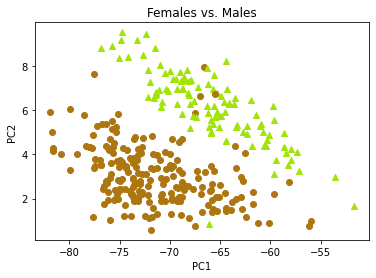

In [206]:
for oh, color, char in zip(proj, sex, characters):
        # plt.title(strings[int(color)])
        rep = 0
        if char == '^':
                rep = 1
        plt.scatter(x=oh[0], y=oh[1], c=colors_array[rep], marker=char)
        plt.title('Females vs. Males')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('gender.pdf')  
plt.show()


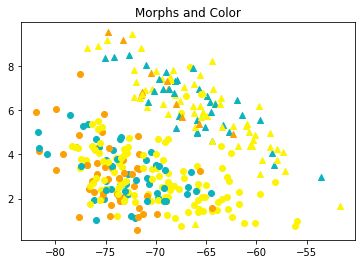

In [135]:

for oh, color, char in zip(proj, morph, characters):
        # plt.title(strings[int(color)])
        plt.scatter(x=oh[0], y=oh[1], c=morph_color_vector[int(color)], marker=char)
        # arrays[int(color)].extend(oh)
        # title = str(int(color)) + '.pdf'
        plt.title('Morphs and Color')
plt.savefig('morph.pdf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [36]:
print(np.shape(proj[:, 0]))

(125,)


In [128]:
print(np.shape(evaluation_vectors))

(6, 321, 1)


In [199]:
strings_titles = ['Vegetation Cover', 'Shrub Cover', 'Herbaceous Cover', 'Tree Cover', 'Relative Humidity', 'Air Temperature']
labels = ['0-25%', '25-50%', '50-75%', '75-100%', 'N/A']
labels_temp = ['0-25', '25-30', '30-35', '35+', 'N/A']
labels_humidity = ['0-22', '22-30', '30-40', '40+', 'N/A']
labels_shrub = ['0-25', '25-50', '50-80', '80+', 'N/A']
labels_total = [labels, labels_shrub, labels, labels, labels_humidity, labels_temp]
def graph_polygons(k, j):
    # Find the indices of points with each color
    color_dict = {}
    for i, color in enumerate(color_vectors[k]):
        if color not in color_dict:
            color_dict[color] = []
        color_dict[color].append(i)

    x = proj[:, 0]
    y = proj[:, 1]

    fig, ax = plt.subplots()
    for color, indices in color_dict.items():
        ax.scatter(x[indices], y[indices], c=list_of_colors[j][color], label=labels_total[k][color])
    ax.legend()
    pen = '2022 Season ' + strings_titles[k]
    plt.title(pen)
    for color, indices in color_dict.items():
        # Extract the x and y coordinates of the points with the same color
        x_color = proj[:, 0][indices]
        y_color = proj[:, 1][indices]
        # Calculate the vertices of the outer polygon using the Convex Hull algorithm
        points = np.column_stack((x_color, y_color))
        hull = ConvexHull(points)
        outer_points = points[hull.vertices]
        polygon = patches.Polygon(outer_points, linewidth=2, edgecolor=list_of_colors[j][color], facecolor='none')
        ax.add_patch(polygon)

    # Show the plot
    ttl = pen + '.pdf'
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.savefig(ttl)
    plt.show()

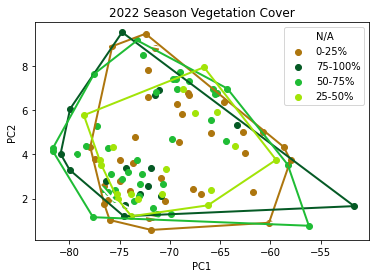

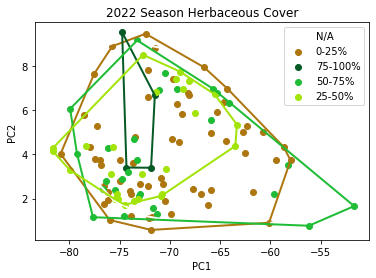

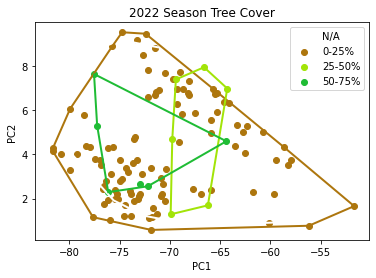

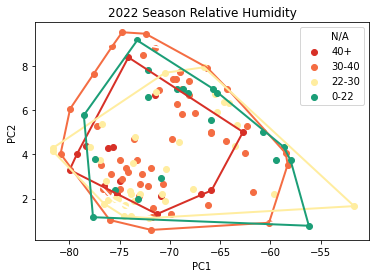

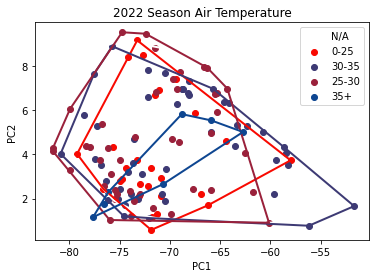

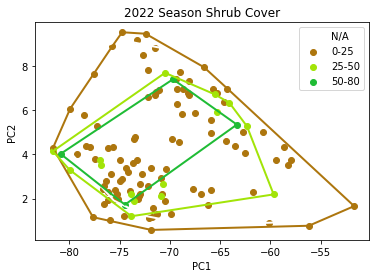

In [200]:
graph_polygons(0, 0)
graph_polygons(2, 0)
graph_polygons(3, 0)
graph_polygons(4, 2)
graph_polygons(5, 1)
graph_polygons(1, 0)